<a href="https://colab.research.google.com/github/ThisuriCham/Pytorch/blob/master/audio_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**torchaudio**: an audio library for PyTorch. 
Aim of torchaudio is to apply PyTorch to the audio domain. By supporting PyTorch, torchaudio follows the same philosophy of providing strong GPU acceleration, having a focus on trainable features through the autograd system, and having consistent style (tensor names and dimension names). Therefore, it is primarily a machine learning library and not a general signal processing library. The benefits of Pytorch is be seen in torchaudio through having all the computations be through Pytorch operations which makes it easy to use and feel like a natural extension. Link -> https://github.com/pytorch/audio

kaldi_io -> https://pytorch.org/audio/kaldi_io.html

The torchaudio package consists of I/O, popular datasets and common audio transformations.Link -> https://pytorch.org/audio/

https://github.com/pytorch/audio




In [0]:
import os

In [0]:
!pip3 install git+git://github.com/pytorch/audio

  Cloning git://github.com/pytorch/audio to /tmp/pip-req-build-hfo5vve9
  Running command git clone -q git://github.com/pytorch/audio /tmp/pip-req-build-hfo5vve9
  Created wheel for torchaudio: filename=torchaudio-0.4.0a0+9ab5dd7-cp36-cp36m-linux_x86_64.whl size=1976518 sha256=63c1dc5dbe60b3466e8f4e8fc5bc8cca6740a3e6662b6efb2e8d1c6d07853308
  Stored in directory: /tmp/pip-ephem-wheel-cache-its43wl0/wheels/4e/7c/c5/0d946acbaccad9fe62590374454c4cf135846c9c96fce3ac75
Successfully built torchaudio
  Found existing installation: torchaudio 0.2
    Uninstalling torchaudio-0.2:
      Successfully uninstalled torchaudio-0.2


In [0]:
!sudo apt-get install sox libsox-dev libsox-fmt-all

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libao-common libao4 libid3tag0 libmad0 libmagic-mgc libmagic1
  libopencore-amrnb0 libopencore-amrwb0 libsox-fmt-alsa libsox-fmt-ao
  libsox-fmt-base libsox-fmt-mp3 libsox-fmt-oss libsox-fmt-pulse libsox3
Suggested packages:
  libaudio2 file
The following NEW packages will be installed:
  libao-common libao4 libid3tag0 libmad0 libmagic-mgc libmagic1
  libopencore-amrnb0 libopencore-amrwb0 libsox-dev libsox-fmt-all
  libsox-fmt-alsa libsox-fmt-ao libsox-fmt-base libsox-fmt-mp3 libsox-fmt-oss
  libsox-fmt-pulse libsox3 sox
0 upgraded, 18 newly installed, 0 to remove and 7 not upgraded.
Need to get 1,268 kB of archives.
After this operation, 9,150 kB of additional disk space will be used.
Get:1 http://a

In [0]:
!git clone https://github.com/pytorch/audio.git #wrong
os.chdir("audio")
!git checkout 301e2e9
!python setup.py install

In [0]:
import torch
import matplotlib.pyplot as plt
import torchaudio



In [0]:
from google.colab import files
uploaded = files.upload()

Saving steam-train-whistle-daniel_simon.wav to steam-train-whistle-daniel_simon.wav


In [36]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!ls


 build	   README.md				       test
 dist	   setup.py				       torchaudio
 docs	  'steam-train-whistle-daniel_simon (1).wav'   torchaudio.egg-info
 LICENSE   steam-train-whistle-daniel_simon.wav        tox.ini


In [37]:
filename = "./steam-train-whistle-daniel_simon.wav"

waveform, sample_rate = torchaudio.load(filename)

print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

Shape of waveform: torch.Size([2, 276858])
Sample rate of waveform: 44100


In [40]:
print(waveform.t())
print(waveform)
print(waveform.t().numpy())

tensor([[ 3.0823e-03, -3.7231e-03],
        [ 6.5002e-03,  2.7466e-04],
        [ 9.2468e-03,  2.3193e-03],
        ...,
        [ 3.0518e-05,  0.0000e+00],
        [ 3.0518e-05,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00]])
tensor([[ 3.0823e-03,  6.5002e-03,  9.2468e-03,  ...,  3.0518e-05,
          3.0518e-05,  0.0000e+00],
        [-3.7231e-03,  2.7466e-04,  2.3193e-03,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00]])
[[ 3.0822754e-03 -3.7231445e-03]
 [ 6.5002441e-03  2.7465820e-04]
 [ 9.2468262e-03  2.3193359e-03]
 ...
 [ 3.0517578e-05  0.0000000e+00]
 [ 3.0517578e-05  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00]]


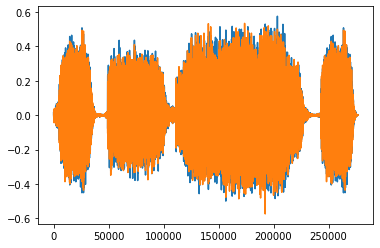

In [41]:
plt.figure()
plt.plot(waveform.t().numpy())